<a href="https://colab.research.google.com/github/saubhagyav/100_Days_Code_Challenge/blob/main/Individual_Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**
During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

In [1]:
# Importing Libraries:- 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Paths of the datasets provided to me.
user = '/content/drive/MyDrive/Alma Better/Capstone Projects/Book_Recommendation_System-Saubhagya_Verma/Copy of Users.csv'
books = '/content/drive/MyDrive/Alma Better/Capstone Projects/Book_Recommendation_System-Saubhagya_Verma/Copy of Books.csv'
ratings = '/content/drive/MyDrive/Alma Better/Capstone Projects/Book_Recommendation_System-Saubhagya_Verma/Copy of Ratings.csv'

In [3]:
df_user = pd.read_csv(user)
df_books = pd.read_csv(books)
df_ratings = pd.read_csv(ratings)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# **Informations about the 3 datasets provided to us for this project:-**
## The Book-Crossing dataset comprises 3 files.

## **1. Users** 

### Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

## **2. Books**

### Books are identified by their respective ISBN. Invalid ISBNs have already been removedfrom the dataset. Moreover, some content-based information is given (Book-Title,Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

## **3. Ratings**

### Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [4]:
df_user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
df_user.shape

(278858, 3)

In [6]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
df_books.shape

(271360, 8)

In [8]:
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [9]:
df_ratings.shape

(1149780, 3)

# **Dropping Insignificant Columns from df_books :-**

In [10]:
#dropping last three columns containing image URLs which will not be required for analysis

df_books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [11]:
df_books.shape

(271360, 5)

# **Calculating the number of null values in the three Datasets:-**

In [12]:
df_user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [13]:
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [14]:
df_ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

# **EDA on the Three Datasets:-** 

In [15]:
df_ratings['Book-Rating'].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'The Ratings')

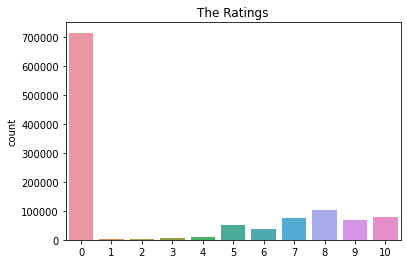

In [16]:
sns.countplot(df_ratings['Book-Rating'].values).set_title('The Ratings')

# **Forming the Final Dataset by merging the above three Datasets:-** 

In [17]:
df_new = pd.merge(df_user, df_ratings, how='inner', on='User-ID')
df_new.head()

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",NaN,034542252,0
2,8,"timmins, ontario, canada",NaN,0002005018,5
3,8,"timmins, ontario, canada",NaN,0060973129,0
4,8,"timmins, ontario, canada",NaN,0374157065,0


In [18]:
df_new.shape

(1149780, 5)

In [19]:
df_new = df_new.merge(df_books, on='ISBN')
df_new.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,41385,"sudbury, ontario, canada",NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


# **Removing Unwanted Values from the Dataset:-**

In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   Location             1031136 non-null  object 
 2   Age                  753301 non-null   float64
 3   ISBN                 1031136 non-null  object 
 4   Book-Rating          1031136 non-null  int64  
 5   Book-Title           1031136 non-null  object 
 6   Book-Author          1031135 non-null  object 
 7   Year-Of-Publication  1031136 non-null  object 
 8   Publisher            1031134 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 78.7+ MB


### **Here the Year-Of-Publication is in object Dtype, it should ideally be in  numeric Dtype. Let us explore this feature a bit more.**

## 1. **Cleaning the Feature - Year of Publication:-**

In [21]:
# Visually inspecting this feature by observing it's unique values.
df_new['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1987, 1989, 1992, 1983, 1979, 1995, 1982, 1985, 1986,
       1978, 1980, 1952, 1990, 1981, 0, 1984, 1968, 1961, 1959, 1946,
       1974, 1958, 1976, 1971, '2002', 1977, 1975, 1965, 1941, 1970,
       '1996', '1999', 1972, '1989', '1992', '2001', 1953, 1962, 1973,
       '2004', 1960, '1997', '2000', '0', 1954, 1966, 1920, '1998',
       '2003', 1967, 1956, 1942, 1955, 1951, 1969, 1948, '1977', '1990',
       '1986', '1994', '1982', 1963, 1964, '1995', '1959', '1988', 1950,
       '1991', '1984', 2005, 1943, '1993', '1987', '1983', '1981', 1957,
       '1972', '1980', 1937, 1940, '1965', '1970', '1979', 1930, 1923,
       1945, 1947, '1976', 1936, '1985', '1978', 1925, '1966', '1958',
       '1975', '1973', 1927, '1974', '1967', '1971', '1969', 2030, '1968',
       2011, '1960', '1964', 2020, 1939, 1926, 1938, '1961', 1911, 1904,
       1949, 1932, 1929, '1953', '1963', '1955', '1944', '1920', '1

# **Observation:-** We can clearly see that their are some noice values in the Year of Publication features :-
### 1. **String Noice Values -** such as 'DK Publishing Inc' and 'Gallimard.
### 2. **Integer Noice Values -** Since this data was collected in august 2004, so any year value greater than 2004 is a noice value.

In [22]:
# Casting Year-Of-Publication to numeric datatype and removing all String Noice Values using coerce functionality.

df_new['Year-Of-Publication'] = pd.to_numeric(df_new['Year-Of-Publication'], 'coerce')

In [23]:
# Cross checking the column to check if the string based noice values are removed or not.
df_new['Year-Of-Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1987., 1989., 1992., 1983., 1979.,
       1995., 1982., 1985., 1986., 1978., 1980., 1952., 1990., 1981.,
          0., 1984., 1968., 1961., 1959., 1946., 1974., 1958., 1976.,
       1971., 1977., 1975., 1965., 1941., 1970., 1972., 1953., 1962.,
       1973., 1960., 1954., 1966., 1920., 1967., 1956., 1942., 1955.,
       1951., 1969., 1948., 1963., 1964., 1950., 2005., 1943., 1957.,
       1937., 1940., 1930., 1923., 1945., 1947., 1936., 1925., 1927.,
       2030., 2011., 2020., 1939., 1926., 1938., 1911., 1904., 1949.,
       1932., 1929., 1944., 1933., 1922., 1897., 2050., 1902., 1924.,
       1921., 1900., 2038., 2010., 1928., 2006., 1901., 2026., 2021.,
       1931., 1378., 1908.,   nan, 1909., 2012., 2008., 1935., 1376.,
       2037., 1906., 1806., 1917., 1919., 1914., 1934., 1910., 2024.])

In [24]:
# Removing all the integer Noice Values from the Dataset.
df_new = df_new[(df_new['Year-Of-Publication']<=2004) & (df_new['Year-Of-Publication']!= 0)]
df_new.head(2)

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada


In [25]:
df_new['Year-Of-Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1987., 1989., 1992., 1983., 1979.,
       1995., 1982., 1985., 1986., 1978., 1980., 1952., 1990., 1981.,
       1984., 1968., 1961., 1959., 1946., 1974., 1958., 1976., 1971.,
       1977., 1975., 1965., 1941., 1970., 1972., 1953., 1962., 1973.,
       1960., 1954., 1966., 1920., 1967., 1956., 1942., 1955., 1951.,
       1969., 1948., 1963., 1964., 1950., 1943., 1957., 1937., 1940.,
       1930., 1923., 1945., 1947., 1936., 1925., 1927., 1939., 1926.,
       1938., 1911., 1904., 1949., 1932., 1929., 1944., 1933., 1922.,
       1897., 1902., 1924., 1921., 1900., 1928., 1901., 1931., 1378.,
       1908., 1909., 1935., 1376., 1906., 1806., 1917., 1919., 1914.,
       1934., 1910.])

In [26]:
# The percentage of Data lost while cleaning the Year-of_publication Feature.
percentage_of_data_lost = (1031136 - df_new.shape[0])*100/1031136
percentage_of_data_lost

1.3788675790584366

# **Therefore, after cleaning the dataset based upon Year-Of-Publication Feature, we lost only a miniscule amount of 1.3% data.**

## **2. Cleaning the Feature - Book Rating :-**

## **Reasons for Eliminating the zero Rating:-** 

### 1. Since zero is not explicitly defined by users for rating the books, it doesn't provide much info regarding the user satisfaction from the book.

### 2. In real life aswell, most of the books sold on amazon don't get rated by the users and it's evident from the count of zero ratings in the count plot.

### **We need data to make recommendations to users only when we have effective insights about them.**

In [27]:
# Size of dataset rows before the cleaing operation.
df_before_size = df_new.shape[0]
df_before_size

1016918

In [28]:
# Removing all the implicit values as they aren't explicitly refered to as ratings.
df_new = df_new[df_new['Book-Rating']>0]

# Size of dataset rows after the cleaing operation.
df_after_size = df_new.shape[0]
df_after_size

377973

In [29]:
# Percentage of Data lost while cleaning the Book Rating Feature.
percentage_of_0_data_lost = (df_before_size- df_after_size)*100/df_before_size
percentage_of_0_data_lost

62.831516405452554

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'The Ratings')

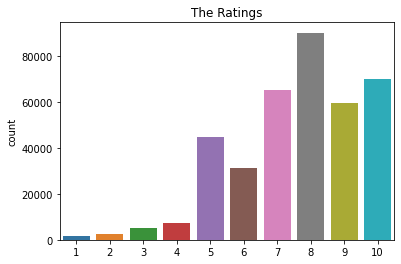

In [30]:
# Visualizing the Book Ratings after removing the implicit value '0':-
sns.countplot(df_new['Book-Rating'].values).set_title('The Ratings')

# **Therefore, after cleaning the dataset based upon Book-Rating Feature, we lost a large amount of our data. We lost almost 63% of values from our dataset.**

## **3. Cleaning the Feature - Age :-**

In [31]:
# Size of dataset rows before the cleaing operation.
df_size_before_removing_age_outliers = df_new.shape[0]
df_size_before_removing_age_outliers

377973

In [32]:
# Setting Age Threshold as 90 years as any person beyond this age won't have the mental capacity to properly review a book.
df_new['Age'] = np.where(df_new['Age']>90, None, df_new['Age'])
df_new[df_new['Age'].isna()].shape[0]
df_new = df_new[~df_new['Age'].isna()]
df_new.head(2)

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
5,67544,"toronto, ontario, canada",30,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
13,219008,"halifax, nova scotia, canada",60,0002005018,7,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada


In [33]:
# Size of dataset rows after the cleaing operation.
df_size_after_removing_age_outliers = df_new.shape[0]
df_size_after_removing_age_outliers

264556

In [34]:
# Percentage of Data lost while cleaning the Age Feature.
percentage_of_data_lost_after_removing_age_outliers = (df_size_before_removing_age_outliers- df_size_after_removing_age_outliers)*100/df_size_before_removing_age_outliers
percentage_of_data_lost_after_removing_age_outliers

30.006640685974926

## **Therefore, after removing the outlers from the age column, we are left with around 2.6 lakh rows of data. We lost nearly 30% of the values during this operation.**


## **Let us have a look at the null values left in the dataeset.**

In [35]:
# Checking the null values in the dataset:-
df_new.isnull().sum()

User-ID                0
Location               0
Age                    0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [36]:
# Removing the 3 null values from the dataset to get the final cleaned Dataset:- 
df_new.dropna(inplace=True)

# Re-checking the number of null values in the dataset:-
df_new.isnull().sum()

User-ID                0
Location               0
Age                    0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

# **Defining the Optimum Book reader**:-

### We can't take every user's rating at facevalue because if the user is a novice reader with only an experience of reading a couple of books, his/her ratings might not be much relevant for finding similarity among books.

### **Therefore as a general rule of thumb we choosing only those User's who have rated atleast 15 Books for builing the recommendation system.**

In [37]:
# Size of dataset rows before the User selection operation.
df_size_before_removing_Novice_readers = df_new.shape[0]
df_size_before_removing_Novice_readers

264553

In [38]:
# Storing the value counts of User-ID's in a new variable named counts1
counts1 = df_new['User-ID'].value_counts()

# Removing the User-ID's which have rated less than 10 books.
df1= df_new[df_new['User-ID'].isin(counts1[counts1 >= 15].index)].reset_index()
df1.drop(columns='index', inplace=True)

In [39]:
# Size of dataset rows after the User selection operation.
df_size_after_removing_Novice_readers = df1.shape[0]
df_size_after_removing_Novice_readers

173569

In [40]:
# Percentage of Data lost while removing the noice readers.
percentage_of_data_lost_after_removing_Novice_readers = (df_size_before_removing_Novice_readers - df_size_after_removing_Novice_readers)*100/df_size_before_removing_Novice_readers
percentage_of_data_lost_after_removing_Novice_readers

34.39159639089332

In [41]:
df1.shape

(173569, 9)

# **Adding a new feature average Rating in the dataset:-**

In [42]:
# Calculating the rating count and mean rating given to each book by the user.

rating_count = df1.groupby('Book-Title')['Book-Rating'].count().to_frame()
rating_mean = df1.groupby('Book-Title')['Book-Rating'].mean().to_frame()

In [43]:
# Renaming the column names before merging them with the final dataset.

rating_count.rename(columns={'Book-Rating':'Rating-Count'}, inplace=True)
rating_mean.rename(columns={'Book-Rating':'Rating-Mean'}, inplace=True)

In [44]:
df1 = pd.merge(df1, rating_count, on='Book-Title', how='inner')
df1 = pd.merge(df1, rating_mean, on='Book-Title', how='inner')

In [45]:
df1.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Rating-Count,Rating-Mean
0,219008,"halifax, nova scotia, canada",60,0002005018,7,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,2,6.500000
1,263325,"fredericton, new brunswick, canada",27,0002005018,6,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,2,6.500000
2,35704,"kansas city, missouri, usa",53,0374157065,6,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,3,8.333333
3,110912,"milpitas, california, usa",36,0374157065,10,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,3,8.333333
4,197659,"indiana, pennsylvania, usa",49,0374157065,9,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,3,8.333333


In [46]:
# rounding off the rating mean feature to 2 decimal points
df1['Rating-Mean'] = df1['Rating-Mean'].round(2)

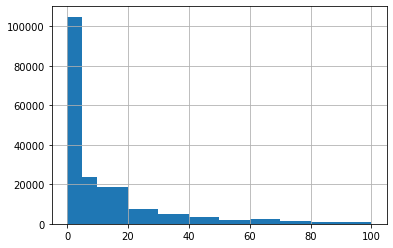

In [47]:
# Visualizing the rating counts of the users. 
df1['Rating-Count'].hist(bins=[0,5,10,20,30,40,50,60,70,80,90,100])

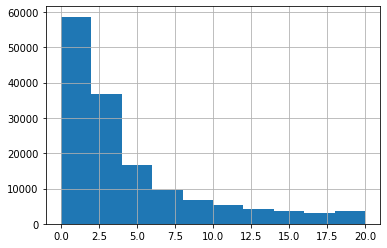

In [48]:
# Visualizing the rating counts of the users in the range between 0 to 20. 
df1['Rating-Count'].hist(bins=[0,2,4,6,8,10,12,14,16,18,20])

## **From this visualization it is evident that most users have rated between 2 to 5 books at most.**

## **Using IMDB Formula to calculate the Weighted Rating for our books**

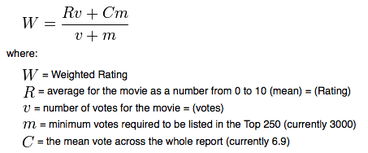

In [49]:
# Calculating the mean vote across the whole df
C = df1['Rating-Mean'].mean()
C

7.874171021322809

In [50]:
rating_count.describe()

,Rating-Count
count,82958.000000
mean,2.092252
std,4.449790
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,223.000000


In [51]:
# Calculating the minimum votes required to be listed in the top 5%
m = rating_count.quantile(.95)[0]
m

6.0

In [52]:
# IMDB formula; source: https://tutorialedge.net/python/building-imdb-top-250-clone-pandas/
def weighted_rating(x, m=m, C=C):
    v = x['Rating-Count']
    R = x['Rating-Mean']

    return (v/(v+m) * R) + (m/(m+v) * C)

In [53]:
# Create relevant sub-dataset
df_top_10 = df1.copy().loc[df1['Rating-Count'] >= m]
df_top_10.shape

(61601, 11)

In [54]:
df_top_10['Score'] = df_top_10.apply(weighted_rating, axis=1)

# **Some Simple Recommendation Systems:-**

## **Recommendations Based upon Top 10 Highest Rated Books**

In [55]:
top_rated = df_top_10[['Book-Title', 'Rating-Mean']]
top_rated = top_rated.groupby(['Book-Title'])['Rating-Mean'].mean().to_frame()
top_rated.sort_values(by='Rating-Mean', ascending=False).head(10)

,Rating-Mean
Book-Title,
Dilbert: A Book of Postcards,9.90
Ranma 1/2 (Ranma 1/2),9.89
The Lorax,9.88
The Giving Tree,9.88
Harry Potter and the Chamber of Secrets Postcard Book,9.83
The World According to Mister Rogers,9.83
Harry Potter Und Der Feuerkelch,9.83
"Mere Christianity: A revised and enlarged edition, with a new introduction, of the three books, The case for Christianity, Christian behaviour, and Beyond personality",9.83
"Old Possum's Book of Practical Cats, Illustrated Edition",9.80


## **Recommendations Based upon Top 10 Most Rated Books by the Users**

In [56]:
top_popular_Books = df_top_10[['Book-Title', 'Rating-Count']]
top_popular_Books = top_popular_Books.groupby(['Book-Title'])['Rating-Count'].mean().to_frame()
top_popular_Books.sort_values(by='Rating-Count', ascending=False).head(10)#.plot(kind='barh')

,Rating-Count
Book-Title,
The Lovely Bones: A Novel,223
The Da Vinci Code,179
Harry Potter and the Chamber of Secrets (Book 2),171
Harry Potter and the Prisoner of Azkaban (Book 3),147
The Secret Life of Bees,143
Bridget Jones's Diary,143
Harry Potter and the Goblet of Fire (Book 4),135
Harry Potter and the Order of the Phoenix (Book 5),132
Life of Pi,130


## **Recommending Books Based Upon Publishers:-**

In [57]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [58]:
# Recommending Books Based Upon Publishers:-
@interact
def recommend_books_based_upon_publishers( publishers = list(df_top_10['Publisher'].value_counts().index)):
  a = df_top_10[df_top_10['Publisher']==publishers][['Book-Title', 'Rating-Mean']]
  a = a.groupby(['Book-Title'])['Rating-Mean'].mean().to_frame()
  a = a.sort_values(by = 'Rating-Mean', ascending=False)
  return a.head(10)


interactive(children=(Dropdown(description='publishers', options=('Ballantine Books', 'Pocket', 'Berkley Publi…

# By using the above drop down window, you can see the books from each publishing house that lie in the top 10 % based upon the Imdb criteria that was shown above.

# **Now Let us Build a Nearest Neighbour Model Based Recommendation System:-**

In [59]:
df_Knn = df1.copy()

In [60]:
df_Knn['Score'] = df1.apply(weighted_rating, axis=1)

In [61]:
df_Knn.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Rating-Count,Rating-Mean,Score
0,219008,"halifax, nova scotia, canada",60,0002005018,7,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,2,6.50,7.530628
1,263325,"fredericton, new brunswick, canada",27,0002005018,6,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,2,6.50,7.530628
2,35704,"kansas city, missouri, usa",53,0374157065,6,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,3,8.33,8.026114
3,110912,"milpitas, california, usa",36,0374157065,10,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,3,8.33,8.026114
4,197659,"indiana, pennsylvania, usa",49,0374157065,9,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,3,8.33,8.026114


In [62]:
# Dropping the columns that aren't much useful for KNN recommendation system.
df_Knn.drop(columns=['ISBN',	'Book-Author',	'Year-Of-Publication',	'Publisher','Age','Location', 'Book-Rating', 'Rating-Count', 'Rating-Mean'], inplace=True)

In [63]:
# Calculating the total number of books in the dataset and the number of books used in the recommendation system.

Number_of_books_in_dataset = len(df_books['Book-Title'].unique())
Number_of_books_considered_for_recommendation = len(df_Knn['Book-Title'].unique())

In [64]:
# Percentage of books considered for recommendation.

per_books_in_recommendation_system = (Number_of_books_considered_for_recommendation*100)/Number_of_books_in_dataset
per_books_in_recommendation_system

34.26105271852479

In [65]:
# Building the Final dataframe for the KNN Model.
df_final = pd.pivot_table(data=df_Knn, index='Book-Title', columns='User-ID', values='Score').fillna(0)

In [66]:
df_final.shape

(82958, 3309)

In [67]:
# Visualizing the sparse matrix formed with Book-Title as rows and User-Id's as columns
df_final.head(3)

User-ID,242,254,388,503,638,643,651,709,741,805,882,929,1025,1131,1211,1435,1548,1585,1674,1733,1848,1903,2024,2030,2033,2179,2276,2313,2337,2358,2363,2766,2977,3145,3167,3282,3346,3363,3371,3373,...,274656,274808,275111,275210,275220,275306,275383,275922,275970,276017,276038,276050,276165,276307,276313,276463,276487,276521,276538,276579,276641,276670,276680,276847,276929,276964,277157,277203,277427,277478,277523,277639,277928,277929,278026,278137,278188,278221,278356,278843
Book-Title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dark Justice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
# converting the sparse matrix into condensed matrix using scipy.sparse functionality.
from scipy.sparse import csr_matrix

df_matrix = csr_matrix(df_final.values)

In [69]:
# Building a KNN model with Cosine Similarity as the target metric for calculating the distances.

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute', n_neighbors=5)
model_knn.fit(df_final)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [71]:
# Building item to item recommendation model for the book readers
def recommend(movie, n_values=11):
  distances, indices = model_knn.kneighbors(df_final.loc[movie,:].values.reshape(1, -1), n_neighbors = n_values)
  for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f'The Top {n_values - 1} Recommendations for Users who have read book {movie} are shown below:-')
    else:
        print('{0}: {1}, with distance of {2}.'.format(i, df_final.index[indices.flatten()[i]], distances.flatten()[i]))

In [72]:
recommend('Dark Justice')

The Top 10 Recommendations for Users who have read book Dark Justice are shown below:-
1: Swimming to Catalina: A Novel, with distance of 0.0.
2: Deadly Justice, with distance of 0.0.
3: Dark Justice, with distance of 0.0.
4: Silent Justice, with distance of 0.2928932188134524.
5: Worst Fears Realized, with distance of 0.42264973081037416.
6: The Final Detail, with distance of 0.42264973081037416.
7: Extreme Justice (Ben Kincaid Series, No. 7), with distance of 0.42264973081037416.
8: Higher Authority, with distance of 0.42264973081037427.
9: Free Fall, with distance of 0.5.
10: New York Dead, with distance of 0.5.


In [73]:
recommend('Anne of the Island', n_values=6)

The Top 5 Recommendations for Users who have read book Anne of the Island are shown below:-
1: Anne of Avonlea (Anne of Green Gables Novels (Paperback)), with distance of 0.4255730420964473.
2: Rilla of Ingleside (Anne of Green Gables Novels (Paperback)), with distance of 0.4314647563850388.
3: Anne of Ingleside (Anne of Green Gables Novels (Paperback)), with distance of 0.43305329048615926.
4: Anne's House of Dreams, with distance of 0.4444444444444443.
5: Anne of Windy Poplars (Anne of Green Gables Novels (Paperback)), with distance of 0.4522774424948339.


In [74]:
recommend("The Hobbit", n_values=9)

The Top 8 Recommendations for Users who have read book The Hobbit are shown below:-
1: Perfume: The Ultimate Guide to the World's Finest Fragrances, with distance of 0.7051160876902057.
2: Collectible Miniature Perfume Bottles (Collectibles (Flammarion)), with distance of 0.7051160876902057.
3: Wait,  Wait...Don't Tell Me! : The Oddly Informative News Quiz, with distance of 0.7051160876902057.
4: HTML : The Definitive Guide, 3rd Edition, with distance of 0.7592282938284616.
5: Captains' Logs: The Unauthorized Complete Trek Voyages, with distance of 0.7914855859429253.
6: Peanuts: A Golden Celebration : The Art and the Story of the World's Best-Loved Comic Strip, with distance of 0.7914855859429253.
7: Guide to Naturalization Records of the United States, with distance of 0.7914855859429253.
8: The World Factbook 1997-98 (Cloth), with distance of 0.7914855859429253.


In [76]:
import pickle
pickle.dump(df_Knn,open('df_final.pkl','wb'))
pickle.dump(model_knn,open('similarity.pkl','wb'))

In [ ]:
# query_index = np.random.choice(df_final.shape[0])
# print(query_index)
# query_index = 446
# distances, indices = model_knn.kneighbors(df_final.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 5)

In [ ]:
# So the randomly selected user's book preferences are shown below
# df_final.iloc[query_index,:]

In [ ]:
# This shows us the top 10 book indices that are closest to our randomly selected user.
# indices.flatten()

In [ ]:
# # This shows the distances of the corresponding closest recommendations for our randomly selected movie.
# distances.flatten()

In [ ]:
# for i in range(0, len(distances.flatten())):
#     if i == 0:
#         print(f'The Top 10 Recommendations for Users who have read book {df_final.index[query_index]} are shown below:-')
#     else:
#         print('{0}: {1}, with distance of {2}.'.format(i, df_final.index[indices.flatten()[i]], distances.flatten()[i]))